In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
# Nainportovanie vsetkoho

import time as Time
import os as Os
import sys as System
import secrets as Secrets

# Os.system("pip install pandas")
# Os.system("pip install numpy")
# Os.system("pip3 install zwoasi")

import threading as Threading
import multiprocessing as Multiprocessing
import json as Json
import requests as Requests

import zwoasi as Asi

import numpy as Np
import pandas as Pd
import matplotlib.pyplot as Plt
from PIL import Image, ImageEnhance
import tensorflow as Tf
from skimage.transform import resize

import Soulmate

print("Import complete")

Import complete


In [3]:
# Zakladne parametre ako cesty a listy

path_ssd = "../../../../media/pi/asdf/"

list_pos = [[48.57, 22.15],]

# Experimentálne parametre ako cesty a listy

lat, lon = 48.57, 22.15

list_pos_rom = [[48.95, 22.26], [48.53, 22.56], [48.13, 22.87], [47.72, 23.17],
                [47.32, 23.47], [46.91, 23.76], [46.48, 24.04], [46.09, 24.35],
                [45.68, 24.64], [45.27, 24.97], [44.86, 25.23], [44.47, 25.56],
                [44.09, 25.89], [43.71, 26.22], [43.34, 26.57], [42.96, 26.90],
                [42.59, 27.25], [42.25, 27.65], [41.89, 28.02], [41.54, 28.44]]

list_pos_ukr = [[49.00, 22.26], [49.00, 22.95], [49.00, 23.65], [49.00, 24.33],
                [49.00, 25.06], [49.00, 25.76], [49.00, 26.44], [49.00, 27.12],
                [49.00, 27.78], [49.00, 28.46], [49.00, 29.16], [49.00, 29.85],
                [49.00, 30.53], [49.00, 31.19], [49.00, 31.87], [49.00, 32.53],
                [49.00, 33.21], [49.00, 33.91], [49.00, 34.59], [49.00, 35.29]]

url = "https://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&appid=53a4c66814d54b4d9cb3ff3b5c013d86"

In [4]:
# Zistenie pocasia


class weather:
    def __init__(self):
        pass

    # komplet vypis
    def catalog(self, lat, lon, url=url):
        return Requests.get(url.format(str(lat), str(lon))).json()

    # Id pocasia a overenie ci je to burka
    def ide(self, lat, lon, url=url):
        return Requests.get(url.format(str(lat), str(lon))).json()["weather"][0]["id"]

    def check(self, lat, lon, url=url):
        return Requests.get(url.format(
            str(lat), str(lon))).json()["weather"][0]["id"] // 100 == 2

    # Preskenovanie poacsia v danej oblasti
    def scan(self, list_pos=list_pos, url=url):
        stav = False
        for pos in list_pos:
            stav = stav or self.check(str(pos[0]), str(pos[1]), url=url)
        return stav

    # Zistenie casu vychodu a zapadu slnka
    def sunrise(self, lat, lon, url=url):
        return Requests.get(url.format(str(lat), str(lon))).json()["sys"]["sunrise"]

    def sunset(self, lat, lon, url=url):
        return Requests.get(url.format(str(lat), str(lon))).json()["sys"]["sunset"]

In [5]:
# Opytame sa aky je cas


class chrono:
    def __init__(self):
        pass

    def actual(self):
        return Time.gmtime(Time.time())

    # Overime ci je noc
    def check(self, lat=lat, lon=lon):
        time_now = Time.time()
        sunset = weather.sunset(self, lat, lon) + 60 * 60
        sunrise = weather.sunrise(self, lat, lon) + 24 * 60 * 60 - 60 * 60
        return sunset < time_now < sunrise

    # Priradí meno
    def name(self, typ=".tiff"):
        actual_time = Time.gmtime(Time.time())

        year = str(actual_time[0])

        if len(str(actual_time[1])) == 1:
            month = "_0" + str(actual_time[1])
        else:
            month = "_" + str(actual_time[1])

        if len(str(actual_time[2])) == 1:
            day = "_0" + str(actual_time[2])
        else:
            day = "_" + str(actual_time[2])

        if len(str(actual_time[3])) == 1:
            hour = "_0" + str(actual_time[3])
        else:
            hour = "_" + str(actual_time[3])

        if len(str(actual_time[4])) == 1:
            minute = "_0" + str(actual_time[4])
        else:
            minute = "_" + str(actual_time[4])

        if len(str(actual_time[5])) == 1:
            sec = "_0" + str(actual_time[5])
        else:
            sec = "_" + str(actual_time[5])

        name_of_image = "TLE-" + year + month + day + hour + minute + sec + typ

        return name_of_image

In [6]:
# Nadefinujeme si kreslenie


def plotImage_Basic(img):
    Fig, Axs = Plt.subplots(1, 1, figsize=(20, 20))
    Axs.imshow(img[0], aspect="equal", cmap='gray')
    Axs.axis('off')
    Plt.tight_layout()
    Plt.show()
    return img

def plotHist_Basic(img):
    img = img[0]
    fig, axs = Plt.subplots(figsize=(10, 10), nrows=1, ncols=1)
    brush = "Black"
    colour = "K"
    axs.hist(img.ravel(), bins=256, histtype="bar", color=brush)
    axs_cdf = axs.twinx()
    axs_cdf.hist(img.ravel(), bins=256, histtype="step", color=brush, cumulative=True)
    axs.set_title(" ".join([colour, "- Kanál"]))
    axs.set_xlabel(" ".join(["Intenzita signálu", colour]))
    axs.set_ylabel("Počet pixelov")
#     paint = ["Red", "Green", "Blue"]
#     colours = ["R", "G", "B"]
#     for i, (colour, brush) in enumerate(zip(colours, paint)):
#         axs[i].hist(img[::, ::, i].ravel(), bins=256, histtype="bar", color=brush)
#         axs_cdf = axs[i].twinx()
#         axs_cdf.hist(img[::, ::, i].ravel(), bins=256, histtype="step", color="".join(["dark", brush]), cumulative=True)
#         axs[i].set_title(" ".join([f"{mode} |" ,colour, "- Kanál"]))
#         axs[i].set_xlabel(" ".join(["Intenzita signálu", colour]))
#         axs[i].set_ylabel("Počet pixelov")
    return img

In [19]:
# Načítanie Cerberus modelu


def model_Cerberus(path_model):
    tleia_model_cerberus = Tf.keras.models.load_model("tleia_model_cerberus.h5")

    # Skompilovanie modelu a jeho sumarizacia Cerberus

    tleia_model_cerberus.compile(
        optimizer='adam',
        loss=Tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=['accuracy'])

    #tleia_model_cerberus.summary()
    return tleia_model_cerberus


# Načítanie Hydra modelu


def model_Hydra(path_model):
    tleia_model_hydra = tf.keras.models.load_model("tleia_model_hydra.h5")

    # Skompilovanie modelu a jeho sumarizacia Hydra

    tleia_model_hydra.compile(
        optimizer='adam',
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=['accuracy'])

    #tleia_model_cerberus.summary()
    return tleia_model_hydra


# Predikcia


def predikcia(arr):
    tleia_model_cerberus = model_Cerberus(path_model)
    return int(tleia_model_cerberus.predict_classes(arr))


# Klasifikacia


def klasifikacia(arr):
    return int(tleia_model_hydra.predict_classes(arr))


# Preprocess

def prepro(img):
    img = resize(img, (250, 200))
    img = Np.expand_dims([img, img, img], axis=0)
    img = Np.swapaxes(img, 1, 3)
    return img

In [8]:
# Ulozi hodnoty fotky z kamery


def save_control_values(filename, settings):
    filename = filename[:-5] + '.txt'
    with open(filename, 'w') as f:
        for k in sorted(settings.keys()):
            f.write('%s: %s\n' % (k, str(settings[k])))
    return settings

In [9]:
# spustenie kamery


def camera_start():

    try:
        Asi.init("indigo_ccd_asi.so")
    except:
        pass

    cameras_found = Asi.list_cameras()
    print("Kamery ktoré sa našli", cameras_found)
    num_cameras = Asi.get_num_cameras()
    print("Počet nájdených kamier", num_cameras)
    camera_id = 0

    camera = Asi.Camera(camera_id)
    camera_info = camera.get_camera_property()
    controls = camera.get_controls()

    camera.set_control_value(Asi.ASI_BANDWIDTHOVERLOAD, 60)
    camera.disable_dark_subtract()

    camera.set_control_value(Asi.ASI_GAIN, 0)
    camera.set_control_value(Asi.ASI_EXPOSURE, 2000000)
    camera.set_control_value(Asi.ASI_WB_B, 50)
    camera.set_control_value(Asi.ASI_WB_R, 50)
    camera.set_control_value(Asi.ASI_GAMMA, 50)
    camera.set_control_value(Asi.ASI_BRIGHTNESS, 50)
    camera.set_control_value(Asi.ASI_FLIP, 3)
    camera.set_image_type(Asi.ASI_IMG_RAW16)

    return camera, controls

In [10]:
# Nastavujeme rozne mody

# Snimanie TLE


def camera_setmode_tle():
    camera.set_control_value(Asi.ASI_GAIN, 600)
    camera.set_control_value(Asi.ASI_EXPOSURE, 1000_000)


# Snimanie Airglowu


def camera_setmode_airglow():
    camera.set_control_value(Asi.ASI_GAIN, 100)
    camera.set_control_value(Asi.ASI_EXPOSURE, 30_000_000)


# Snimanie meteorov


def camera_setmode_meteor():
    pass


# Snimanie free


def camera_setmode_free():
    pass


# Snimanie free


def camera_setmode_manual(gain=None, Exposure=None):
    if not gain == None:
        camera.set_control_value(Asi.ASI_GAIN, 600)
    if not exposure == None:
        camera.set_control_value(Asi.ASI_EXPOSURE, 1000_000)


# Snimanie cez den


def camera_setmode_day():
    camera.set_control_value(Asi.ASI_GAIN, 0)
    camera.set_control_value(Asi.ASI_EXPOSURE, 100)

In [11]:
# urobi snimku z kamery


def camera_shot(path_ssd=path_ssd):
    filename = chrono.name(chrono)
    print("Fotka|", filename, "|sa odfotila")
    return camera.capture(filename=None)


# Urobi a uloží snimku z kamery


def camera_record(path_ssd=path_ssd):
    filename = chrono.name(chrono)
    img = camera.capture(filename=path_ssd+filename)
    print("Fotka|", filename, "|sa odfotila")
    save_control_values(path_ssd + filename, camera.get_control_values())
    print("Fotka|", filename, "|sa uložila")
    return img


def camera_temp(activation=True, temp=-10, fan=True):
    settings = camera.get_control_values()
#     print("Aktualne nastavenie", f"Power: {settings["CoolerOn"]}|", f"Teplota: {settings["Temperature"]}|", f"Ventilator: {settings["CoolerOn"]}")
    camera.set_control_value(Asi.ASI_COOLER_ON, activation)
    camera.set_control_value(Asi.ASI_TARGET_TEMP, temp)
    camera.set_control_value(Asi.ASI_FAN_ON, fan)
#     print("Nastavene nastavenie", f"Power: {activation}|", f"Teplota: {temp}|", f"Ventilator: {fan}")

# Zastavenie kamery


def camera_stop():
    try:
        camera.stop_video_capture()
        camera.stop_exposure()
        print("Kamera sa zastavila")
    except:
        pass

In [12]:
# Ukonci vsetko


def end_of_service():
    camera_stop()
    print("Zastavil sa celý systém")
    # DtBETA

In [13]:
# Jendoduche zkontrastoavnie obrazka


def convert(image, bottom=1, top=99):
    imin, imax = Np.percentile(image, (bottom, top))
    image[image < imin] = imin
    image[image > imax] = imax
    image = image - image.min()
    image = image / image.max()
    image = image * 16384
    image = image.astype("uint16")
    return image


def demo_bin(img):
    pass

In [14]:
# Urobi maly jpeg


def thumbnail(img, path_ssd=path_ssd):
    filename = chrono.name(chrono, ".jpeg")
    img = convert(img, 1, 90)
    img = img // 65
    dim = (600, 600)
    img = img.astype("uint8")
    img = Image.fromarray(img)
    img = img.resize(dim)
    img = img.save(path_ssd + filename)
    print("Fotka|", filename, "|uložila thumbnail")

In [15]:
# MAIN script
# run once 2

# Test = True
# T = 10*60 # Time of Batch
# t = 2 #exposure
# gain = 600

camera, controls = camera_start()
settings = save_control_values(path_ssd + "master-" + chrono.name(chrono), controls)
# for seti in settings:
#     print(seti, settings[seti])

Kamery ktoré sa našli ['ZWO ASI533MC Pro']
Počet nájdených kamier 1


Fotka| TLE-2021_09_30_09_00_02.tiff |sa odfotila


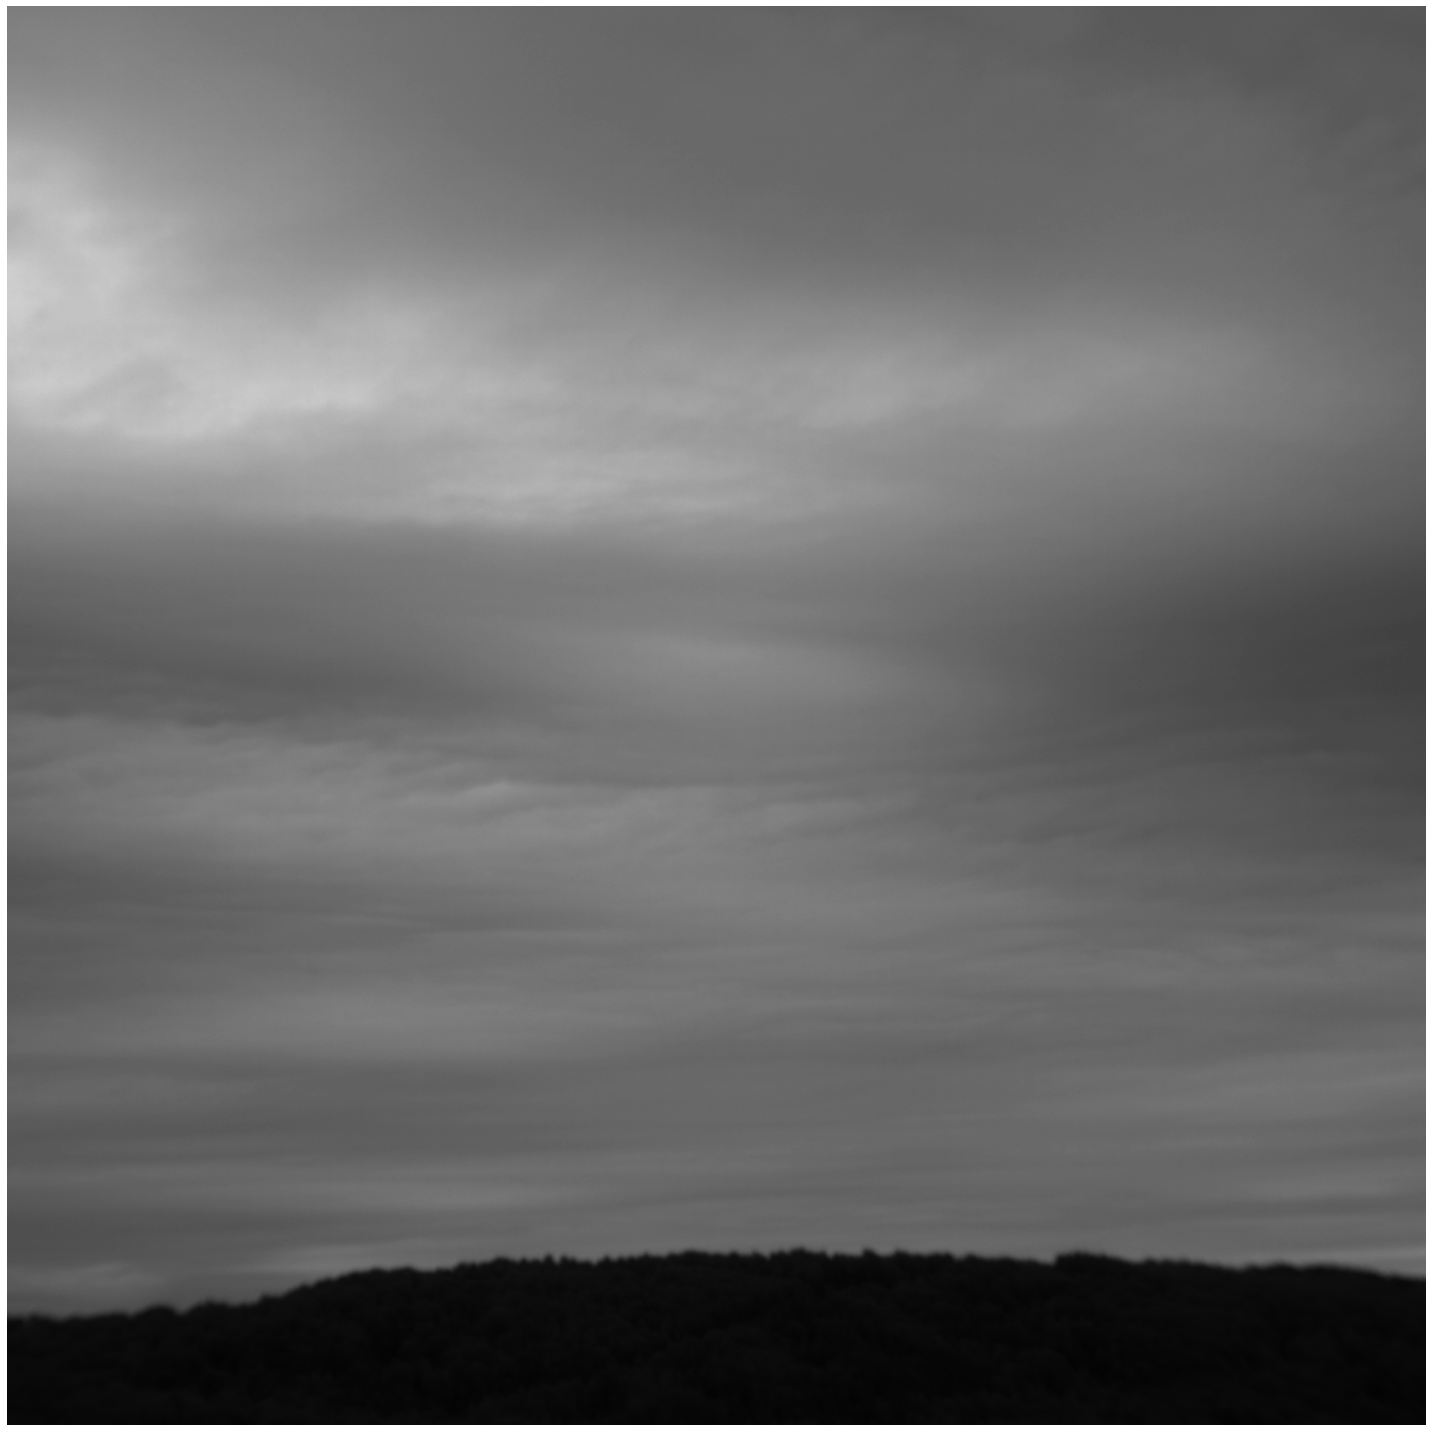

{'Gain': 0,
 'Exposure': 100,
 'WB_R': 50,
 'WB_B': 50,
 'Offset': 50,
 'BandWidth': 60,
 'Flip': 3,
 'AutoExpMaxGain': 300,
 'AutoExpMaxExpMS': 60000,
 'AutoExpTargetBrightness': 100,
 'HardwareBin': 0,
 'MonoBin': 0,
 'Temperature': 149,
 'CoolPowerPerc': 14,
 'TargetTemp': -20,
 'CoolerOn': 1}

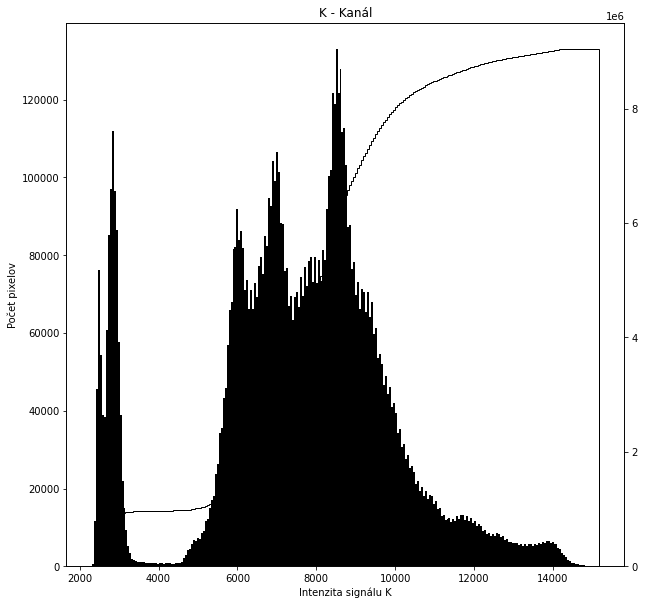

In [16]:
try:
    camera_setmode_day()
except:
    camera, controls = camera_start()
    camera_setmode_day()

camera_temp(activation=True, temp=-20, fan=True)
plotHist_Basic(plotImage_Basic([camera_shot()]))
# plotImage_Basic([convert(camera_shot(), 1, 99)])
camera.get_control_values()

In [ ]:
t1 = Time.time()
for i in range(10):
    predikcia(prepro(camera_shot()))
t2 = Time.time()
(t2-t1)/10

Fotka| TLE-2021_09_30_09_10_01.tiff |sa odfotila
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Fotka| TLE-2021_09_30_09_10_32.tiff |sa odfotila
Fotka| TLE-2021_09_30_09_10_46.tiff |sa odfotila
Fotka| TLE-2021_09_30_09_11_01.tiff |sa odfotila
Fotka| TLE-2021_09_30_09_11_17.tiff |sa odfotila


In [17]:
t1 = Time.time()
for i in range(10):
    thumbnail(camera_record(path_ssd = path_ssd))
t2 = Time.time()
(t2-t1)/10

Fotka| TLE-2021_09_30_09_00_40.tiff |sa odfotila
Fotka| TLE-2021_09_30_09_00_40.tiff |sa uložila
Fotka| TLE-2021_09_30_09_00_42.jpeg |uložila thumbnail
Fotka| TLE-2021_09_30_09_00_42.tiff |sa odfotila
Fotka| TLE-2021_09_30_09_00_42.tiff |sa uložila
Fotka| TLE-2021_09_30_09_00_44.jpeg |uložila thumbnail
Fotka| TLE-2021_09_30_09_00_45.tiff |sa odfotila
Fotka| TLE-2021_09_30_09_00_45.tiff |sa uložila
Fotka| TLE-2021_09_30_09_00_46.jpeg |uložila thumbnail
Fotka| TLE-2021_09_30_09_00_47.tiff |sa odfotila
Fotka| TLE-2021_09_30_09_00_47.tiff |sa uložila
Fotka| TLE-2021_09_30_09_00_48.jpeg |uložila thumbnail
Fotka| TLE-2021_09_30_09_00_49.tiff |sa odfotila
Fotka| TLE-2021_09_30_09_00_49.tiff |sa uložila
Fotka| TLE-2021_09_30_09_00_50.jpeg |uložila thumbnail
Fotka| TLE-2021_09_30_09_00_51.tiff |sa odfotila
Fotka| TLE-2021_09_30_09_00_51.tiff |sa uložila
Fotka| TLE-2021_09_30_09_00_52.jpeg |uložila thumbnail
Fotka| TLE-2021_09_30_09_00_53.tiff |sa odfotila
Fotka| TLE-2021_09_30_09_00_53.tiff |sa

0.20600109338760375

In [18]:
end_of_service()

Kamera sa zastavila
Zastavil sa celý systém


In [26]:
# TESTBENCH

x = 49.0541394
y = 22.2485033

cas = chrono()
pocasie = weather()
pocasie.catalog(x, y), pocasie.scan(), cas.check()

({'coord': {'lon': 22.2485, 'lat': 49.0541},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02d'}],
  'base': 'stations',
  'main': {'temp': 294.71,
   'feels_like': 294.31,
   'temp_min': 293.99,
   'temp_max': 294.71,
   'pressure': 1017,
   'humidity': 53,
   'sea_level': 1017,
   'grnd_level': 978},
  'visibility': 10000,
  'wind': {'speed': 0.56, 'deg': 183, 'gust': 1.21},
  'clouds': {'all': 16},
  'dt': 1632742877,
  'sys': {'type': 2,
   'id': 2019485,
   'country': 'SK',
   'sunrise': 1632716679,
   'sunset': 1632759555},
  'timezone': 7200,
  'id': 723559,
  'name': 'Snina',
  'cod': 200},
 False,
 False)

In [20]:
end_of_service()

Kamera sa zastavila
Zastavil sa celý systém


In [ ]:
pocasie = weather()
cas = chrono()

camera_setmode_tle()

Batch = 300
t = 1
T = 6*60*60

while True:
    if  cas.check():
        if  pocasie.scan():
            for i in range(Batch):
                camera_record()
#                 image = camera_shot()
#                 if predikcia(prepro(camera_shot())):
#                     thumbnail(image)
#                     image = Image.fromarray(img, mode='I;16')
#                     image.save(path_ssd + chrono.name(chrono))
                
#                 else:
#                     pass
        else: 
        
            print("Bez burky, Čas: ", chrono.name(chrono))
            Time.sleep(Batch*t)
    else:
        print("Deň, Čas: ", chrono.name(chrono)) 
        Time.sleep(Batch*t)

Deň, Čas:  TLE-2021_09_27_13_53_28.tiff


In [ ]:
end_of_service()